In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
#from tensorflow.data.experimental import sample_from_datasets

tfkl = tfk.layers

**Preprocessing**

As typical, we'll start with the MNIST data. Recall from last time, we have to do some transformations and preprocessing on these images.

In [2]:
data, info = tfds.load('mnist', with_info=True)

In [3]:
preprocess = lambda d: (tf.cast(d["image"], tf.float32)/255, tf.one_hot(d["label"], depth=10))

ds_train = data["train"].map(preprocess).cache().batch(32)
ds_test = data["test"].map(preprocess).cache().batch(32)

In [4]:
img_shape = info.features['image'].shape

In [5]:
img_shape

(28, 28, 1)

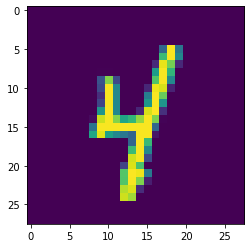

In [6]:
x, y = next(iter(ds_train))
plt.imshow(x[0,:,:,0])

**CNNs in TF Keras**

We'll use the Sequential class rely on new layer types that correspond to concepts we covered in lecture: Conv2D, AvgPool2D, MaxPool2D. 

Details such as kernel size, padding, strides and so on must be specified as args to these classes, where appropriate.

In [7]:
model = tfk.Sequential()
model.add(tfkl.Conv2D(filters = 1, kernel_size=(3,3), strides=(1,1), 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model.add(tfkl.MaxPool2D(pool_size=(4,4)))
model.add(tfkl.Flatten())
model.add(tfkl.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 36)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                370       
Total params: 380
Trainable params: 380
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model.fit(ds_train, steps_per_epoch=20, epochs=20, validation_data=ds_test)

Epoch 1/20
20/20 [==============================] - 2s 79ms/step - loss: 2.3120 - val_loss: 2.2988
Epoch 2/20
20/20 [==============================] - 1s 38ms/step - loss: 2.2820 - val_loss: 2.2763
Epoch 3/20
20/20 [==============================] - 1s 35ms/step - loss: 2.2758 - val_loss: 2.2544
Epoch 4/20
20/20 [==============================] - 1s 37ms/step - loss: 2.2328 - val_loss: 2.2263
Epoch 5/20
20/20 [==============================] - 1s 34ms/step - loss: 2.1989 - val_loss: 2.1942
Epoch 6/20
20/20 [==============================] - 1s 32ms/step - loss: 2.1655 - val_loss: 2.1598
Epoch 7/20
20/20 [==============================] - 1s 35ms/step - loss: 2.1289 - val_loss: 2.1201
Epoch 8/20
20/20 [==============================] - 1s 43ms/step - loss: 2.1245 - val_loss: 2.0761
Epoch 9/20
20/20 [==============================] - 1s 45ms/step - loss: 2.0496 - val_loss: 2.0277
Epoch 10/20
20/20 [==============================] - 1s 39ms/step - loss: 1.9918 - val_loss: 1.9758
Epoch 11/

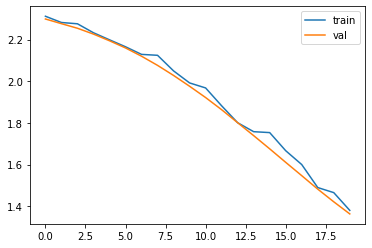

In [10]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Probability')

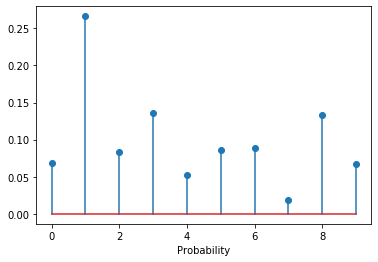

In [11]:
plt.stem(model.predict(ds_test.take(1))[9, :])
plt.xlabel("Digit")
plt.xlabel("Probability")

Which architectural hyperparameters might we change in the above?



**Exercise - Deep CNN**

Build and fit your own CNN model with 3 convolutional **modules**, where each one contains:
  * kernel convolution 
    * you pick number of kernels
    * you pick kernel shape/size
    * you pick activation
  * pooling
  * dropout

We'll use the Fashion MNIST dataset, a low-res collection of images of clothing.

In [16]:

train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train
images = images/255.0
images = images[:, :, :, np.newaxis]
labels = tf.one_hot(labels.astype(np.int32),depth=10)

# optional - TF Datasets objects
# fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
# fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

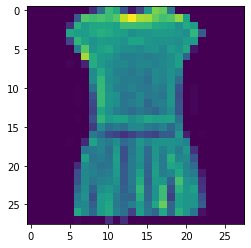

In [17]:
plt.imshow(images[3, :, :, :].squeeze())

In [18]:
# your code here
model0 = tfk.Sequential()
model0.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model0.add(tfkl.MaxPool2D(pool_size=2))
model0.add(tfkl.Dropout(0.2))

#
model0.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model0.add(tfkl.MaxPool2D(pool_size=2))
model0.add(tfkl.Dropout(0.2))

#
model0.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu', input_shape=(28, 28, 1)))
model0.add(tfkl.MaxPool2D(pool_size=2))
model0.add(tfkl.Dropout(0.2))

#flatten
model0.add(tfkl.GlobalMaxPool2D())
model0.add(tfkl.Dense(10,activation='softmax'))

In [19]:

model0.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
)

results = model0.fit(images,labels,steps_per_epoch=20, epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 0s 4ms/step - loss: 2.2997
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 2.2810
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 2.2870
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 2.2675
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 2.2564
Epoch 6/20
20/20 [==============================] - 0s 4ms/step - loss: 2.2146
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 2.1977
Epoch 8/20
20/20 [==============================] - 0s 5ms/step - loss: 2.1619
Epoch 9/20
20/20 [==============================] - 0s 4ms/step - loss: 2.1157
Epoch 10/20
20/20 [==============================] - 0s 5ms/step - loss: 2.0996
Epoch 11/20
20/20 [==============================] - 0s 7ms/step - loss: 2.0325
Epoch 12/20
20/20 [==============================] - 0s 6ms/step - loss: 1.9900
Epoch 13/20
20/20 [==============================

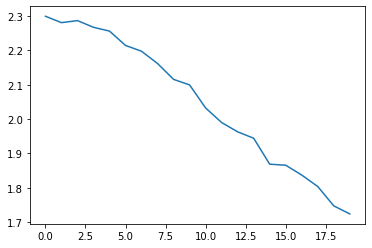

In [20]:
plt.plot(results.history["loss"])


#|**Exercise - Transfer Learning**



In [21]:
data, info = tfds.load('rock_paper_scissors', with_info=True)
train_data = data["train"].map(lambda x: (tf.cast(x["image"], tf.float32) / 255., tf.one_hot(x["label"], depth=3) )).batch(32)

In [22]:
info.features['image'].shape

(300, 300, 3)

,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

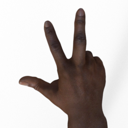
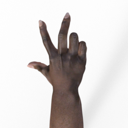
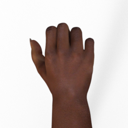
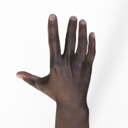
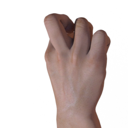
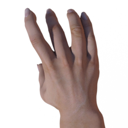
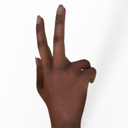
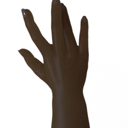
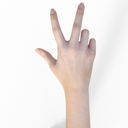
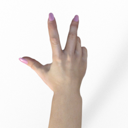

In [23]:
tfds.as_dataframe(data["train"].take(10), info)

# Exercise

1. Build a deep CNN model and train it for this binary classification task. Fit the model using the small dataset of 500 samples, *train_data*.

What accuracy can your model acheive on the training data?

In [44]:
# Your code here
model1 = tfk.Sequential()
model1.add(tfkl.Conv2D(filters = 32, kernel_size = 2, strides = 2,
                     padding = "valid", activation = "relu", input_shape = (300, 300, 3)))

model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))
#
model1.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))

#
model1.add(tfkl.Conv2D(filters = 8, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=2))
model1.add(tfkl.Dropout(0.2))


#flatten
model1.add(tfkl.GlobalMaxPool2D())
model1.add(tfkl.Dense(3,activation='softmax'))

In [45]:
model1.compile(
    optimizer = tfk.optimizers.RMSprop(),
    loss = tfk.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [46]:
train_data500 = train_data.take(500).repeat()
results = model1.fit(train_data500,steps_per_epoch=10, epochs=20)

Epoch 1/20
10/10 [==============================] - 3s 282ms/step - loss: 1.1083 - accuracy: 0.3562
Epoch 2/20
10/10 [==============================] - 3s 333ms/step - loss: 1.1015 - accuracy: 0.3375
Epoch 3/20
10/10 [==============================] - 3s 253ms/step - loss: 1.1106 - accuracy: 0.3125
Epoch 4/20
10/10 [==============================] - 3s 262ms/step - loss: 1.1052 - accuracy: 0.3125
Epoch 5/20
10/10 [==============================] - 3s 293ms/step - loss: 1.1048 - accuracy: 0.3094
Epoch 6/20
10/10 [==============================] - 3s 257ms/step - loss: 1.1024 - accuracy: 0.2969
Epoch 7/20
10/10 [==============================] - 3s 252ms/step - loss: 1.1009 - accuracy: 0.3375
Epoch 8/20
10/10 [==============================] - 3s 275ms/step - loss: 1.0979 - accuracy: 0.3301
Epoch 9/20
10/10 [==============================] - 3s 278ms/step - loss: 1.1024 - accuracy: 0.3250
Epoch 10/20
10/10 [==============================] - 3s 252ms/step - loss: 1.0968 - accuracy: 0.3781

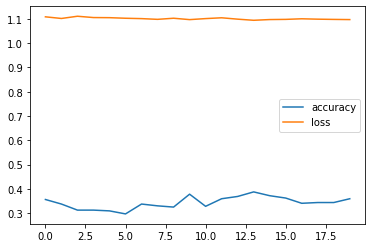

In [47]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.legend(labels = ['accuracy', 'loss'])

Now use transfer learning by incorporating the pretrained VGG16 model.

In [48]:
from tensorflow.keras.applications import VGG16

In [58]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(300,300,3))

Build a Sequential model, using our VGG16 base. Make sure the freeze the weights of the convolutional backbone, but leave the remainder of the network weights as learnable. Fit this model and compare the overall accuracy as well as the loss curves (efficiency).


In [63]:
# Your code here
model2 = tfk.Sequential()
model2.add(tfkl.Conv2D(filters = 32, kernel_size=2, strides=2, 
                      padding="valid", activation='relu', input_shape=conv_base.output_shape[1:]))
model2.add(tfkl.MaxPool2D(pool_size=2))
model2.add(tfkl.Dropout(0.2))

model2.add(tfkl.Conv2D(filters = 16, kernel_size=2, strides=1, 
                      padding="valid", activation='relu'))
model2.add(tfkl.MaxPool2D(pool_size=1))
model2.add(tfkl.Dropout(0.2))

model2.add(tfkl.Conv2D(filters = 8, kernel_size=1, strides=1, 
                      padding="valid", activation='relu'))
model2.add(tfkl.MaxPool2D(pool_size=1))
model2.add(tfkl.Dropout(0.2))

model2.add(tfkl.GlobalMaxPool2D())
model2.add(tfkl.Dense(3,activation='softmax'))

model3 = tfk.Sequential()
for l in conv_base.layers:
    model3.add(l)
model3.add(model2)

model3.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [64]:
train_data500 = train_data.take(500).repeat()
results = new_model.fit(train_data500,steps_per_epoch=2, epochs=20)

Epoch 1/20
2/2 [==============================] - 12s 6s/step - loss: 0.6937 - accuracy: 0.6875
Epoch 2/20
2/2 [==============================] - 12s 6s/step - loss: 0.6417 - accuracy: 0.7344
Epoch 3/20
2/2 [==============================] - 12s 6s/step - loss: 0.5592 - accuracy: 0.8281
Epoch 4/20
2/2 [==============================] - 12s 6s/step - loss: 0.5717 - accuracy: 0.7969
Epoch 5/20
2/2 [==============================] - 12s 6s/step - loss: 0.5940 - accuracy: 0.7344
Epoch 6/20
2/2 [==============================] - 12s 6s/step - loss: 0.5639 - accuracy: 0.8281
Epoch 7/20
2/2 [==============================] - 12s 6s/step - loss: 0.5663 - accuracy: 0.7344
Epoch 8/20
2/2 [==============================] - 12s 6s/step - loss: 0.4735 - accuracy: 0.8594
Epoch 9/20
2/2 [==============================] - 12s 6s/step - loss: 0.6679 - accuracy: 0.7344
Epoch 10/20
2/2 [==============================] - 12s 6s/step - loss: 0.5497 - accuracy: 0.7969
Epoch 11/20
2/2 [======================

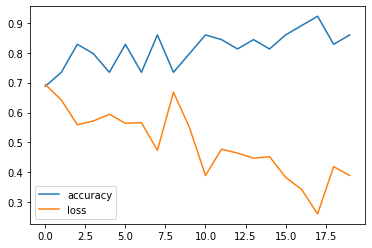

In [65]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["loss"])
plt.legend(labels=["accuracy", "loss"])